In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 5.2 MB/s eta 0:00:00


In [ ]:
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [ ]:
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
import os
import sys
import urllib.request
import json
import pandas  as pd

In [ ]:
df = pd.read_csv('대학백과_한성대_리뷰.csv')
df

,Unnamed: 0,0
0,0,학교 시설은 좋은 편. 하지만 캠퍼스 크기가 너무 작음.
1,1,신설학과다보니 아직 어수선함. 교수님들은 열심히 하심. 학교에서 지원도 적당히 해주...
2,2,장점: 학교 시설은 좋고 작아서 오히려 괜찮음 강의실가는데 엄청 안뛰어도 됨 학식도...
3,3,사실 여기서 본인이 잘만하면 야간이든 주간이든 대기업가는건 가능함 기계 말고는 코딩...
4,4,학교 상상하는거 보다 좁음 학교 안 시설은 ㄱㅊ은데 생각보다 진짜 디메리트임 그냥 ...
...,...,...
363,363,인문학부에 과가 4개 밖에 없는 게 너무 아쉽습니다.
364,364,NaN
365,365,NaN
366,366,비록 통합되서 제품과는 사라지지만.. 사라질따까지 제품과 흥해라!!


In [ ]:
df.columns =['index','리뷰']

In [ ]:
del df['index']

In [ ]:
df = df.dropna()
df

,리뷰
0,학교 시설은 좋은 편. 하지만 캠퍼스 크기가 너무 작음.
1,신설학과다보니 아직 어수선함. 교수님들은 열심히 하심. 학교에서 지원도 적당히 해주...
2,장점: 학교 시설은 좋고 작아서 오히려 괜찮음 강의실가는데 엄청 안뛰어도 됨 학식도...
3,사실 여기서 본인이 잘만하면 야간이든 주간이든 대기업가는건 가능함 기계 말고는 코딩...
4,학교 상상하는거 보다 좁음 학교 안 시설은 ㄱㅊ은데 생각보다 진짜 디메리트임 그냥 ...
...,...
359,학과가 없어요. 트랙제도 쓸 데 없어요.
362,트랙제도가 아직 어수선한 느낌이 들고 트랙제도로 인해 학생회가 아닌 이상 특정과 선...
363,인문학부에 과가 4개 밖에 없는 게 너무 아쉽습니다.
366,비록 통합되서 제품과는 사라지지만.. 사라질따까지 제품과 흥해라!!


In [ ]:
review_text = ''
for temp in df['리뷰']:
    review_text += str(temp)
review_text = re.sub(r'[^가-힣a-zA-Z0-9]',' ',review_text)
review_text

'학교 시설은 좋은 편  하지만 캠퍼스 크기가 너무 작음 신설학과다보니 아직 어수선함  교수님들은 열심히 하심  학교에서 지원도 적당히 해주는거같음  학과 미래는 창창하다고 하는데 아직은 잘 모르겠음 장점  학교 시설은 좋고 작아서 오히려 괜찮음 강의실가는데 엄청 안뛰어도 됨 학식도 맛있는편 단점  다른 학교 다 대면할 때 블랜디드함  2시간 온라인 강의  1시간 대면강의  1시간 수업들을려고 학교 왔다갔다해야함  트렉제로 인해 소속감 없음  학생회 활동 안하면 아는 사람도 없고 걍 수업만 듣고 집감  이것저것 해본다하지만 사실상 원하는 트렉으로 졸업하고 싶으면 들어야하는 과목이 정해져 있음 걍 트렉의미가 없음 소속감 1도 없는 과임  캐바케일순 있는데 주변환경이 다들 열심히 하는 분위기도 아님  공부 벼락치기했는데 학점 4 0넘고 장학금까지 받음  진짜 학점 잘 받기는 쉬움 컴공은 어렵다고 듣긴함  교바교이긴 하지만 열정적인 교수님들 많이 못봄 코로나 온라인으로 3년내내 똑같은 온라인 강의 올리는 교수님 많았음  야간 차별은 없는데 남들 다 저녁에 놀때 수업 들어야함 저녁없는 삶을 살아야함 사실상 편입하게 된 결정적 이유  은근 저녁없는 삶이 엄청 힘들었음 장학금 제도도     과1등 해도 100프로 지원 안해주고 80프로인가 지원해줌사실 여기서 본인이 잘만하면 야간이든 주간이든 대기업가는건 가능함 기계 말고는 코딩을 다 해서  기계도 하긴 함  취업할 때 유리할 수 있음학교 상상하는거 보다 좁음 학교 안 시설은   은데 생각보다 진짜 디메리트임 그냥 고등학교 다니는 기분이 듬트랙제라 그런지 다른 학교랑 커리 큘럼이 다름  법 정책 트랙 기준  다른 법학과는 이론 중심인 반면에 트랙은 실용적인 느낌이 강함트랙제 는 다양한 사람들과 만날 기회가 생김 맘먹고 친구 사귈려하면 충분히 많이 사귐 동아리 활동 이나 교내 학교 행사 참여하면 더 쉽게 사귐 대신 선후배의 끈끈함은 없음 친구 사귀고 싶으면 먼저다가가야함 애초에 학교에서 뭘 해 줄 이유가 없음 등록금이랑 4

In [ ]:
from konlpy.tag import Okt
import re
from collections import Counter
from wordcloud import WordCloud

# Okt 함수를 이용해 형태소 분석
okt = Okt()
line =[]

line = okt.pos(review_text)

print(line)

n_adj =[]
# 명사 또는 형용사인 단어만 n_adj에 넣어주기
for word, tag in line:
    if tag in ['Noun','Adjective']:
        if len(word) > 1:
            n_adj.append(word)
# 명사 또는 형용사인 단어 및 2글자 이상인 단어 선택 시
# n_adj = [word for wor

[('학교', 'Noun'), ('시설', 'Noun'), ('은', 'Josa'), ('좋은', 'Adjective'), ('편', 'Noun'), ('하지만', 'Conjunction'), ('캠퍼스', 'Noun'), ('크기', 'Noun'), ('가', 'Josa'), ('너무', 'Adverb'), ('작음', 'Adjective'), ('신설', 'Noun'), ('학과', 'Noun'), ('다', 'Josa'), ('보니', 'Verb'), ('아직', 'Adverb'), ('어수선함', 'Adjective'), ('교수', 'Noun'), ('님', 'Suffix'), ('들은', 'Verb'), ('열심히', 'Adverb'), ('하', 'Exclamation'), ('심', 'Noun'), ('학교', 'Noun'), ('에서', 'Josa'), ('지원', 'Noun'), ('도', 'Josa'), ('적당히', 'Adjective'), ('해주는거', 'Verb'), ('같음', 'Adjective'), ('학과', 'Noun'), ('미래', 'Noun'), ('는', 'Josa'), ('창창하다고', 'Adjective'), ('하는데', 'Verb'), ('아직', 'Adverb'), ('은', 'Noun'), ('잘', 'Verb'), ('모르겠음', 'Verb'), ('장점', 'Noun'), ('학교', 'Noun'), ('시설', 'Noun'), ('은', 'Josa'), ('좋고', 'Adjective'), ('작아서', 'Adjective'), ('오히려', 'Noun'), ('괜찮음', 'Adjective'), ('강의실', 'Noun'), ('가는데', 'Verb'), ('엄청', 'Adverb'), ('안', 'VerbPrefix'), ('뛰어도', 'Verb'), ('됨', 'Verb'), ('학식', 'Noun'), ('도', 'Josa'), ('맛있는', 'Adjective'), ('편', 'Noun'), 

In [ ]:
#제외할 단어 추가
stop_words = "한성대 학교 대학 학과 학생 교수 수업 때문 입니다 정말 사람 생각" #추가할 때 띄어쓰기로 추가해주기
stop_words = set(stop_words.split(' '))
# 불용어를 제외한 단어만 남기기
n_adj = [word for word in n_adj if not word in stop_words]
n_adj
#가장 많이 나온 단어 100개 저장
counts = Counter(n_adj)
tags = counts.most_common(100)
tags

[('트랙', 134),
 ('좋은', 65),
 ('장점', 60),
 ('학부', 55),
 ('우리', 55),
 ('선택', 49),
 ('제도', 48),
 ('전공', 47),
 ('다른', 45),
 ('단점', 44),
 ('시설', 43),
 ('캠퍼스', 43),
 ('불만', 43),
 ('없어요', 41),
 ('그냥', 40),
 ('컴공', 39),
 ('선배', 36),
 ('학식', 33),
 ('서울', 33),
 ('있습니다', 33),
 ('여러분', 33),
 ('취업', 30),
 ('느낌', 30),
 ('같은', 30),
 ('장학금', 29),
 ('하나', 29),
 ('있고', 29),
 ('트렉', 28),
 ('친구', 27),
 ('있는', 27),
 ('행정', 27),
 ('다양한', 26),
 ('공대', 26),
 ('대부분', 25),
 ('진짜', 24),
 ('여기', 24),
 ('학점', 23),
 ('자기', 23),
 ('학년', 23),
 ('원하는', 22),
 ('환경', 22),
 ('제라', 21),
 ('대한', 21),
 ('별로', 20),
 ('성적', 20),
 ('이상', 20),
 ('동기', 20),
 ('강의', 19),
 ('지원', 18),
 ('학생회', 18),
 ('있어서', 18),
 ('많은', 18),
 ('사실', 17),
 ('기계', 17),
 ('건물', 17),
 ('비교', 17),
 ('추천', 17),
 ('좋고', 16),
 ('있음', 16),
 ('분야', 16),
 ('있다', 16),
 ('없는', 15),
 ('있는데', 15),
 ('공부', 15),
 ('정도', 15),
 ('처리', 15),
 ('나름', 15),
 ('제품', 15),
 ('소속', 14),
 ('그런지', 14),
 ('인생', 14),
 ('없다', 14),
 ('좋았어요', 14),
 ('자격증', 14),
 ('가지', 14),
 ('없음', 

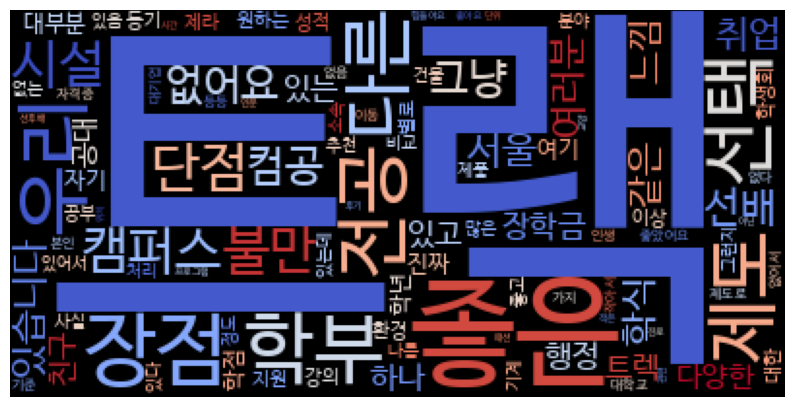

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
word_cloud = WordCloud(font_path=path, background_color='black',max_font_size=400,colormap='coolwarm').generate_from_frequencies(dict(tags))

# 사이즈 설정 및 화면에 출력
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
#워드클라우드 사진으로 저장
plt.savefig('대학백과_한성대_리뷰_워드클라우드.png', bbox_inches='tight')
plt.show()

In [ ]:
# 워드클라우드 복붙
wordcloud_1 = str(tags)
wordcloud_1 = wordcloud_1.replace("'",' ')
wordcloud_1

'[( 트랙 , 134), ( 좋은 , 65), ( 장점 , 60), ( 학부 , 55), ( 우리 , 55), ( 선택 , 49), ( 제도 , 48), ( 전공 , 47), ( 다른 , 45), ( 단점 , 44), ( 시설 , 43), ( 캠퍼스 , 43), ( 불만 , 43), ( 없어요 , 41), ( 그냥 , 40), ( 컴공 , 39), ( 선배 , 36), ( 학식 , 33), ( 서울 , 33), ( 있습니다 , 33), ( 여러분 , 33), ( 취업 , 30), ( 느낌 , 30), ( 같은 , 30), ( 장학금 , 29), ( 하나 , 29), ( 있고 , 29), ( 트렉 , 28), ( 친구 , 27), ( 있는 , 27), ( 행정 , 27), ( 다양한 , 26), ( 공대 , 26), ( 대부분 , 25), ( 진짜 , 24), ( 여기 , 24), ( 학점 , 23), ( 자기 , 23), ( 학년 , 23), ( 원하는 , 22), ( 환경 , 22), ( 제라 , 21), ( 대한 , 21), ( 별로 , 20), ( 성적 , 20), ( 이상 , 20), ( 동기 , 20), ( 강의 , 19), ( 지원 , 18), ( 학생회 , 18), ( 있어서 , 18), ( 많은 , 18), ( 사실 , 17), ( 기계 , 17), ( 건물 , 17), ( 비교 , 17), ( 추천 , 17), ( 좋고 , 16), ( 있음 , 16), ( 분야 , 16), ( 있다 , 16), ( 없는 , 15), ( 있는데 , 15), ( 공부 , 15), ( 정도 , 15), ( 처리 , 15), ( 나름 , 15), ( 제품 , 15), ( 소속 , 14), ( 그런지 , 14), ( 인생 , 14), ( 없다 , 14), ( 좋았어요 , 14), ( 자격증 , 14), ( 가지 , 14), ( 없음 , 13), ( 대학교 , 13), ( 제도로 , 13), ( 이동 , 13), ( 등등 , 13), ( 없어서 , 13), ( 작아서 